In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-02-09 18:34:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   145KB/s    in 0.5s    

2019-02-09 18:34:26 (145 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [5]:
df = pd.read_csv('FuelConsumption.csv')

In [7]:
linear = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

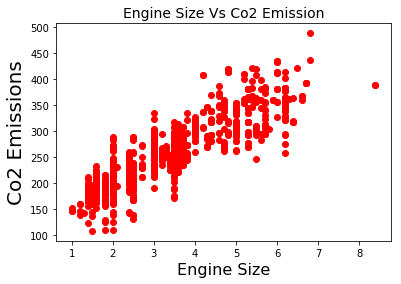

In [29]:
plt.scatter(linear['ENGINESIZE'],linear['CO2EMISSIONS'], color='red')
plt.title('Engine Size Vs Co2 Emission', fontsize=14)
plt.xlabel('Engine Size', fontsize=16)
plt.ylabel('Co2 Emissions', fontsize=20)
plt.show()     
        

In [57]:
msk = np.random.rand(len(df)) <0.8
train = linear[msk]
test = linear[~msk]
test['CO2EMISSIONS'].mean()


259.815

In [76]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

print(regr.coef_[0],'-----------',regr.intercept_[0])

[39.13335277] ----------- 125.50754024259186


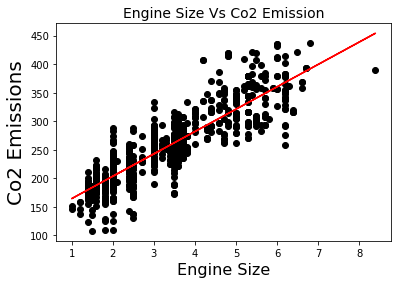

In [84]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color='black')
plt.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0],'-r')
plt.title('Engine Size Vs Co2 Emission', fontsize=14)
plt.xlabel('Engine Size', fontsize=16)
plt.ylabel('Co2 Emissions', fontsize=20)
plt.show()  

In [94]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predict = regr.predict(test_x)
r2_score(predict,test_y)

0.7083467229214183